In [1]:
import itertools
import sys, os

import numpy as np
import pandas as pd
from scipy.special import comb
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import statsmodels.api as sm

sns.set(rc={'figure.figsize':(15,8)})
sns.set_context('poster')
sns.set_style('white')
#plt.rcParams["figure.dpi"] = 600
from sklearn.model_selection import train_test_split

https://www.kaggle.com/code/rafjaa/dealing-with-very-small-datasets#t1

https://medium.com/rants-on-machine-learning/what-to-do-with-small-data-d253254d1a89

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import run_ML_classification as ml

In [4]:
from joblib import dump, load
stack = load('10CC_ML_classifier.joblib') 

# classify simulations

In [5]:
dpath = '../results'
sim_df = pd.read_csv(os.path.join(dpath,'monte_het_clean_df.csv.gz',))

# sim_df = pd.concat([
#     sim_df1,
#     sim_df2,
#     sim_df3,
#     sim_df4,
#     sim_df5,
#     sim_df6,
#     sim_df7,
# ])

In [6]:
sim_df.rename(columns={'Bptotal[N]':'ref_Bp[N]','Bptotal[C]':'ref_Bp[C]'}, inplace=True)

In [7]:
X_sim, forest_features, logistic_Nfeatures, logistic_Cfeatures = ml.df2finalX(sim_df, groupby_cols=['run_id'])

In [8]:
X_sim

,max_Nday,max_Nbiomass,max_Cday,max_Cbiomass,mean_Nbiomass,std_Nbiomass,median_Nbiomass,mean_Cbiomass,std_Cbiomass,median_Cbiomass,...,ref_Bp[N]_73.8,ref_Bp[N]_76.9,ref_Bp[N]_79.8,ref_Bp[N]_80.9,ref_Bp[N]_82.0,ref_Bp[N]_84.2,ref_Bp[N]_86.9,ref_Bp[N]_87.8,ref_Bp[N]_88.7,ref_Bp[N]_91.0
run_id,,,,,,,,,,,,,,,,,,,,,
monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME_C1_29_lowN_all_EXOENZYME_h8519271514136708373,5.720139,48.478110,5.720139,399.217701,4.303229,1.286886,4.206716,36.823801,11.011191,35.998402,...,0.393367,0.284965,0.187351,0.149965,0.113412,0.036157,0.0,0.0,0.0,0.0
monte_EXOENZYME_100_monte_vpro_12_88_EXOENZYME_C2_50_lowN_all_EXOENZYME_h8519271514136708373,9.745833,33.791800,10.834722,181.835638,1.000000,0.000000,1.000000,1.094026,0.165308,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
monte_EXOENZYME_100_monte_vpro_13_4_EXOENZYME_C3_68_lowN_all_EXOENZYME_h8519271514136708373,7.984028,70.735295,7.984028,648.347484,1.357662,0.578080,1.000000,9.582779,7.940775,6.922995,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
monte_EXOENZYME_100_monte_vpro_13_4_EXOENZYME_C3_73_lowN_all_EXOENZYME_h8519271514136708373,7.984028,68.387680,7.984028,631.649964,1.200846,0.374667,1.000000,7.297622,6.371312,5.001925,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
monte_EXOENZYME_100_monte_vpro_13_69_EXOENZYME_C1_74_lowN_all_EXOENZYME_h8519271514136708373,13.695833,18.830866,13.695833,134.907224,1.801020,0.878383,1.515539,13.440149,7.613322,11.877188,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
monte_ROS_9_monte_vpro_93_82_ROS_C1_64_lowN_all_ROS_h-8660846992299669535,9.745833,33.550012,9.745833,270.944752,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
monte_ROS_9_monte_vpro_96_60_ROS_C1_59_lowN_all_ROS_h-8660846992299669535,5.720139,37.039607,6.731944,289.969113,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
monte_ROS_9_monte_vpro_96_60_ROS_C1_66_lowN_all_ROS_h-8660846992299669535,5.720139,37.586272,6.731944,282.631226,1.000000,0.000000,1.000000,1.101954,0.007327,1.104559,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [9]:
X_sim.max()

max_Nday           26.747222
max_Nbiomass       95.306506
max_Cday           26.747222
max_Cbiomass      879.713352
mean_Nbiomass      43.007223
                     ...    
ref_Bp[N]_84.2      3.072362
ref_Bp[N]_86.9      3.033937
ref_Bp[N]_87.8      3.021167
ref_Bp[N]_88.7      3.007769
ref_Bp[N]_91.0      2.976599
Length: 138, dtype: float64

In [10]:
y_sim_pred_prop = stack.predict_proba(X_sim)
y_sim_pred = stack.predict(X_sim)

In [11]:
max_sim_prob = np.amax(y_sim_pred_prop, axis=1)
max_sim_prob

array([0.98294572, 0.88653274, 0.98538904, ..., 0.99023672, 0.99023705,
       0.99069751])

In [12]:
df_predicted_prob = pd.DataFrame(y_sim_pred_prop, columns=stack.classes_)
df_predicted_prob['run_id'] =  X_sim.index
df_predicted_prob['y_pred'] =  y_sim_pred
df_predicted_prob['max_prob'] =  max_sim_prob
df_predicted_prob


,Axenic,Inhibited,Other,Strong,Sustained,Weak,run_id,y_pred,max_prob
0,0.001866,0.002021,0.007971,0.002223,0.982946,0.002973,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,Sustained,0.982946
1,0.062281,0.011696,0.024738,0.006594,0.008158,0.886533,monte_EXOENZYME_100_monte_vpro_12_88_EXOENZYME...,Weak,0.886533
2,0.985389,0.001901,0.008053,0.001200,0.001675,0.001781,monte_EXOENZYME_100_monte_vpro_13_4_EXOENZYME_...,Axenic,0.985389
3,0.986948,0.001964,0.006830,0.001115,0.001416,0.001728,monte_EXOENZYME_100_monte_vpro_13_4_EXOENZYME_...,Axenic,0.986948
4,0.966881,0.002209,0.020880,0.001737,0.004949,0.003344,monte_EXOENZYME_100_monte_vpro_13_69_EXOENZYME...,Axenic,0.966881
...,...,...,...,...,...,...,...,...,...
49344,0.002434,0.002491,0.004545,0.001406,0.001764,0.987360,monte_ROS_9_monte_vpro_93_82_ROS_C1_64_lowN_al...,Weak,0.987360
49345,0.001630,0.001978,0.003630,0.001134,0.001391,0.990237,monte_ROS_9_monte_vpro_96_60_ROS_C1_59_lowN_al...,Weak,0.990237
49346,0.001630,0.001978,0.003630,0.001134,0.001391,0.990237,monte_ROS_9_monte_vpro_96_60_ROS_C1_66_lowN_al...,Weak,0.990237
49347,0.001630,0.001978,0.003630,0.001134,0.001391,0.990237,monte_ROS_9_monte_vpro_97_23_ROS_C1_3_lowN_all...,Weak,0.990237


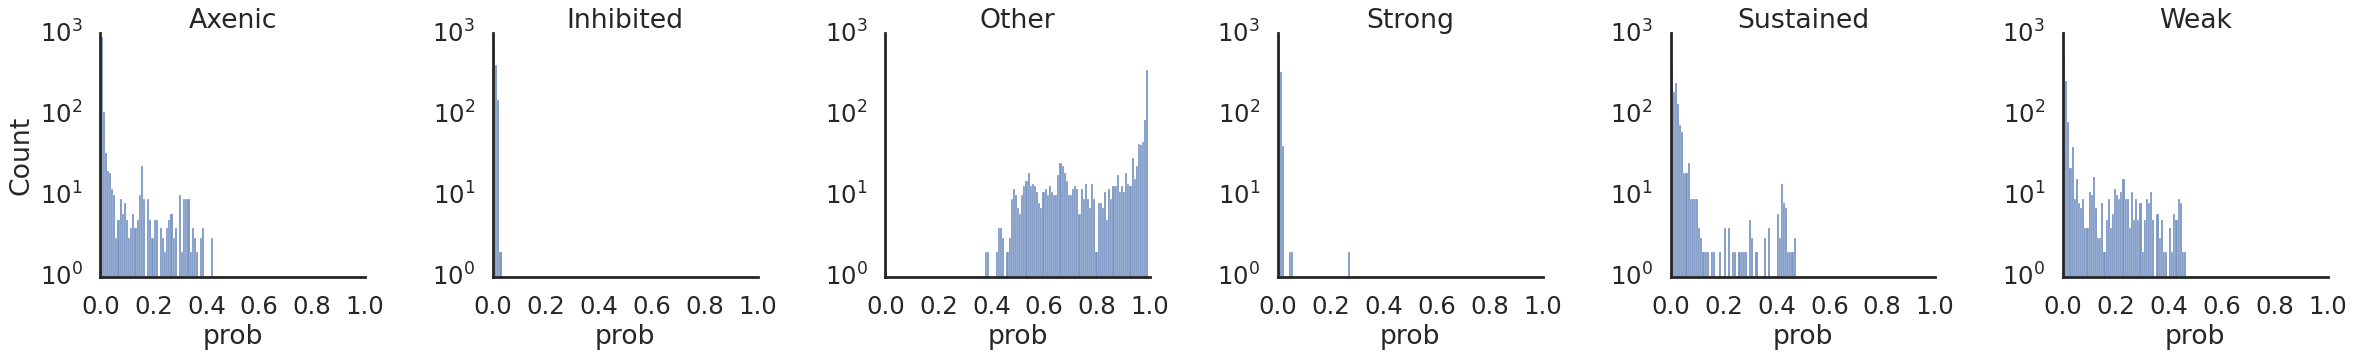

In [13]:
mdf_predicted_prob = df_predicted_prob.melt(
    id_vars=['run_id','y_pred', 'max_prob'], 
    value_vars=stack.classes_, 
    value_name='prob', var_name='Group')
g = sns.displot(
    data=mdf_predicted_prob.loc[mdf_predicted_prob.y_pred.isin(['Other'])], # & mdf_predicted_prob.max_prob.le(0.5)],
    x='prob', 
    col='Group', #col_wrap=3, #hue='model', multiple='stack', 
    facet_kws=dict(sharey=False, ),
    #row='model',

)
g.set_titles(col_template='{col_name}')
g.set(yscale='log')

In [14]:
df_predicted_classes = pd.DataFrame({
    'run_id' : X_sim.index,
    'y_pred' : y_sim_pred,
    'max_prob' : max_sim_prob,
})
df_predicted_classes

,run_id,y_pred,max_prob
0,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,Sustained,0.982946
1,monte_EXOENZYME_100_monte_vpro_12_88_EXOENZYME...,Weak,0.886533
2,monte_EXOENZYME_100_monte_vpro_13_4_EXOENZYME_...,Axenic,0.985389
3,monte_EXOENZYME_100_monte_vpro_13_4_EXOENZYME_...,Axenic,0.986948
4,monte_EXOENZYME_100_monte_vpro_13_69_EXOENZYME...,Axenic,0.966881
...,...,...,...
49344,monte_ROS_9_monte_vpro_93_82_ROS_C1_64_lowN_al...,Weak,0.987360
49345,monte_ROS_9_monte_vpro_96_60_ROS_C1_59_lowN_al...,Weak,0.990237
49346,monte_ROS_9_monte_vpro_96_60_ROS_C1_66_lowN_al...,Weak,0.990237
49347,monte_ROS_9_monte_vpro_97_23_ROS_C1_3_lowN_all...,Weak,0.990237


In [15]:
df_predicted_classes[['idx', 'media', 'which', 'model', 'hash']] = df_predicted_classes.run_id.str.rsplit('_', n=4, expand=True)


In [16]:
df_predicted_classes

,run_id,y_pred,max_prob,idx,media,which,model,hash
0,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,Sustained,0.982946,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,lowN,all,EXOENZYME,h8519271514136708373
1,monte_EXOENZYME_100_monte_vpro_12_88_EXOENZYME...,Weak,0.886533,monte_EXOENZYME_100_monte_vpro_12_88_EXOENZYME...,lowN,all,EXOENZYME,h8519271514136708373
2,monte_EXOENZYME_100_monte_vpro_13_4_EXOENZYME_...,Axenic,0.985389,monte_EXOENZYME_100_monte_vpro_13_4_EXOENZYME_...,lowN,all,EXOENZYME,h8519271514136708373
3,monte_EXOENZYME_100_monte_vpro_13_4_EXOENZYME_...,Axenic,0.986948,monte_EXOENZYME_100_monte_vpro_13_4_EXOENZYME_...,lowN,all,EXOENZYME,h8519271514136708373
4,monte_EXOENZYME_100_monte_vpro_13_69_EXOENZYME...,Axenic,0.966881,monte_EXOENZYME_100_monte_vpro_13_69_EXOENZYME...,lowN,all,EXOENZYME,h8519271514136708373
...,...,...,...,...,...,...,...,...
49344,monte_ROS_9_monte_vpro_93_82_ROS_C1_64_lowN_al...,Weak,0.987360,monte_ROS_9_monte_vpro_93_82_ROS_C1_64,lowN,all,ROS,h-8660846992299669535
49345,monte_ROS_9_monte_vpro_96_60_ROS_C1_59_lowN_al...,Weak,0.990237,monte_ROS_9_monte_vpro_96_60_ROS_C1_59,lowN,all,ROS,h-8660846992299669535
49346,monte_ROS_9_monte_vpro_96_60_ROS_C1_66_lowN_al...,Weak,0.990237,monte_ROS_9_monte_vpro_96_60_ROS_C1_66,lowN,all,ROS,h-8660846992299669535
49347,monte_ROS_9_monte_vpro_97_23_ROS_C1_3_lowN_all...,Weak,0.990237,monte_ROS_9_monte_vpro_97_23_ROS_C1_3,lowN,all,ROS,h-8660846992299669535


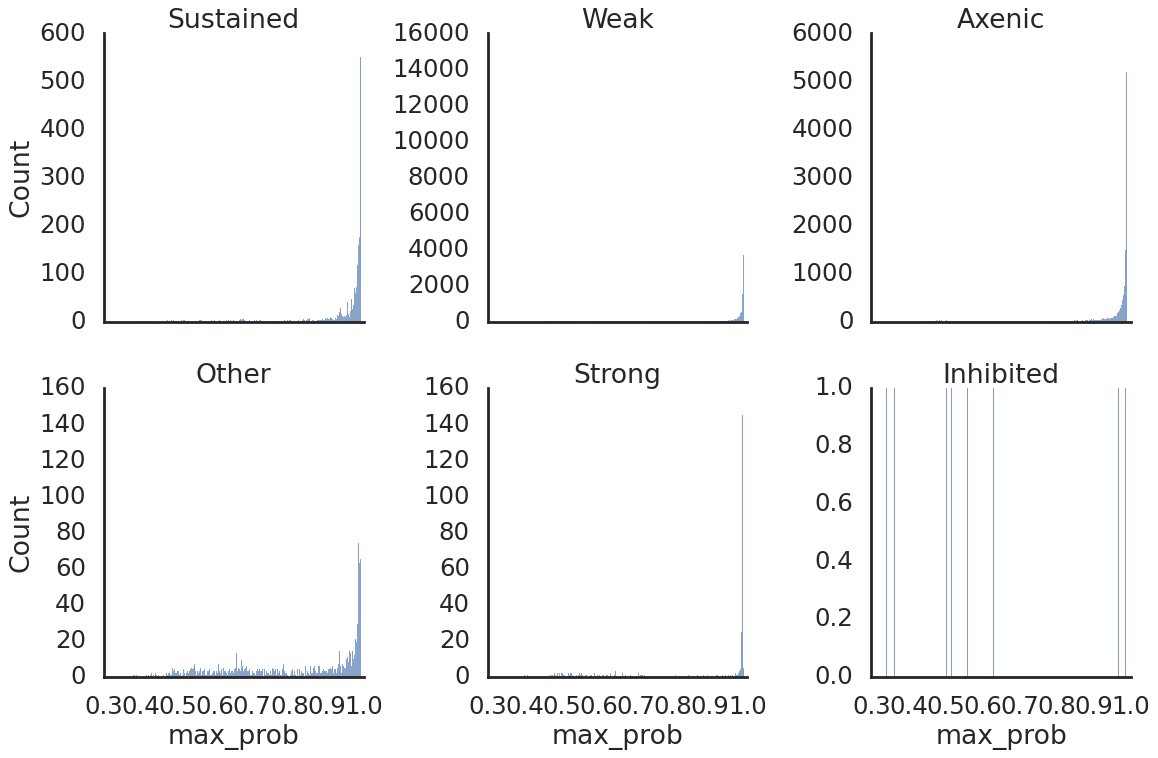

In [17]:
g = sns.displot(
    data=df_predicted_classes,
    x='max_prob', 
    col='y_pred', col_wrap=3, #hue='model', multiple='stack', 
    facet_kws=dict(sharey=False, ),
    #row='model',

)
g.set_titles(col_template='{col_name}')
#g.set(yscale='log')

In [18]:
df_predicted_classes.y_pred.value_counts()

Weak         29309
Axenic       16008
Sustained     2392
Other         1325
Strong         301
Inhibited       14
Name: y_pred, dtype: int64

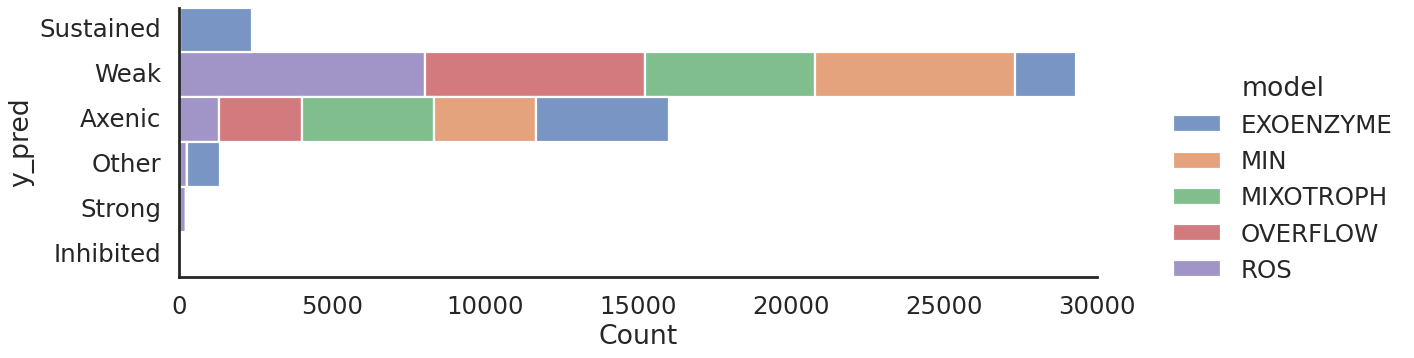

In [19]:
g = sns.displot(
    data=df_predicted_classes.reset_index(),
    #x='max_prob', 
    y='y_pred', hue='model', #dodge=False,
    #kind='count',
    multiple='stack',
    #legend=False,
    aspect=3,
)
#g.set_titles(col_template='{col_name}')
# g.set(xscale='log')

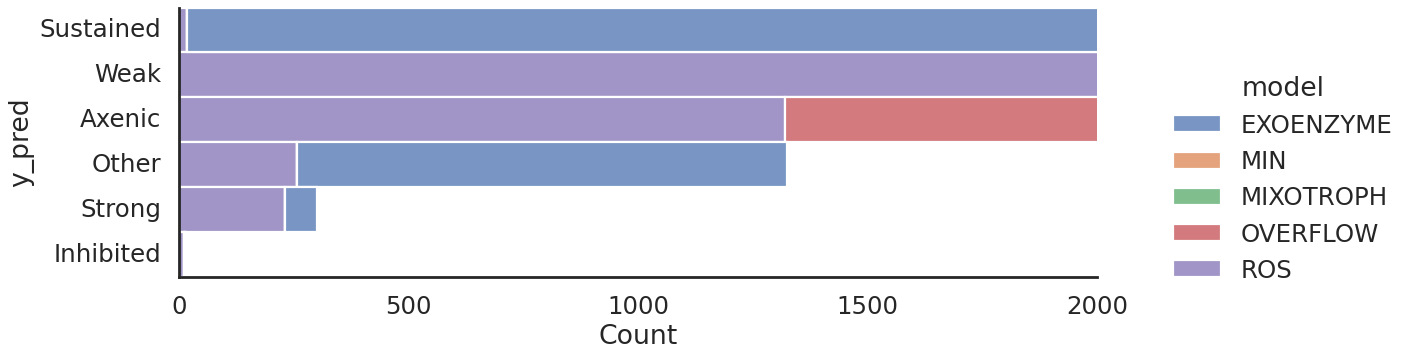

In [20]:
g = sns.displot(
    data=df_predicted_classes.reset_index(),
    #x='max_prob', 
    y='y_pred', hue='model', #dodge=False,
    #kind='count',
    multiple='stack',
    #legend=False,
    aspect=3,
)
#g.set_titles(col_template='{col_name}')
g.set(xlim=(0,2000))

In [21]:
sample_ids = df_predicted_classes.groupby(['model','y_pred']).run_id.sample(50, replace=True)

In [22]:
sample_df = sim_df.loc[sim_df.run_id.isin(sample_ids)]
sample_df = sample_df.merge(df_predicted_classes, on='run_id', how='left')
sample_df

,Unnamed: 0,Bp,Np,Cp,Bh,Nh,Ch,DON,RDON,DIN,...,Bhtotal[N],Bhtotal[C],run_id,y_pred,max_prob,idx,media,which,model,hash
0,6512,0.892857,0.000000,0.000000,28.571429,0.000000,0.000000,3.000000,0.000000,100.000000,...,28.571429,142.857143,monte_OVERFLOW_85_monte_vpro_19_60_OVERFLOW_C2...,Weak,0.990235,monte_OVERFLOW_85_monte_vpro_19_60_OVERFLOW_C2_50,lowN,all,OVERFLOW,h6878164821315599434
1,6513,1.666368,1.060080,4.635702,25.858653,6.350872,0.632651,2.530945,2.119602,92.877765,...,32.209525,129.925914,monte_OVERFLOW_85_monte_vpro_19_60_OVERFLOW_C2...,Weak,0.990235,monte_OVERFLOW_85_monte_vpro_19_60_OVERFLOW_C2_50,lowN,all,OVERFLOW,h6878164821315599434
2,6514,4.152824,2.651674,11.603025,21.686844,5.259211,1.083132,8.307966,4.241246,86.164522,...,26.946054,109.517350,monte_OVERFLOW_85_monte_vpro_19_60_OVERFLOW_C2...,Weak,0.990235,monte_OVERFLOW_85_monte_vpro_19_60_OVERFLOW_C2_50,lowN,all,OVERFLOW,h6878164821315599434
3,6515,6.791314,4.336562,18.971268,20.707376,4.937306,1.600496,11.027741,5.502781,79.161206,...,25.644682,105.137375,monte_OVERFLOW_85_monte_vpro_19_60_OVERFLOW_C2...,Weak,0.990235,monte_OVERFLOW_85_monte_vpro_19_60_OVERFLOW_C2_50,lowN,all,OVERFLOW,h6878164821315599434
4,6516,15.880165,10.141350,44.320751,22.280773,5.044767,3.439552,15.509076,8.430592,55.177562,...,27.325540,114.843418,monte_OVERFLOW_85_monte_vpro_19_60_OVERFLOW_C2...,Weak,0.990235,monte_OVERFLOW_85_monte_vpro_19_60_OVERFLOW_C2_50,lowN,all,OVERFLOW,h6878164821315599434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55643,3694130,0.107415,0.014982,0.371157,0.167545,2.027960,0.001533,25.812945,104.320658,0.012781,...,2.195505,0.839260,monte_OVERFLOW_5_monte_vpro_39_21_OVERFLOW_C3_...,Weak,0.464851,monte_OVERFLOW_5_monte_vpro_39_21_OVERFLOW_C3_34,lowN,all,OVERFLOW,h6878164821315599434
55644,3694131,0.106906,0.014910,0.369396,0.166793,1.741498,0.001524,25.687674,104.733727,0.012778,...,1.908292,0.835490,monte_OVERFLOW_5_monte_vpro_39_21_OVERFLOW_C3_...,Weak,0.464851,monte_OVERFLOW_5_monte_vpro_39_21_OVERFLOW_C3_34,lowN,all,OVERFLOW,h6878164821315599434
55645,3694132,0.106591,0.014865,0.368307,0.166324,1.587914,0.001518,25.610396,104.965420,0.012777,...,1.754238,0.833139,monte_OVERFLOW_5_monte_vpro_39_21_OVERFLOW_C3_...,Weak,0.464851,monte_OVERFLOW_5_monte_vpro_39_21_OVERFLOW_C3_34,lowN,all,OVERFLOW,h6878164821315599434
55646,3694133,0.106264,0.014818,0.367178,0.165836,1.444672,0.001512,25.530519,105.189400,0.012776,...,1.610508,0.830692,monte_OVERFLOW_5_monte_vpro_39_21_OVERFLOW_C3_...,Weak,0.464851,monte_OVERFLOW_5_monte_vpro_39_21_OVERFLOW_C3_34,lowN,all,OVERFLOW,h6878164821315599434


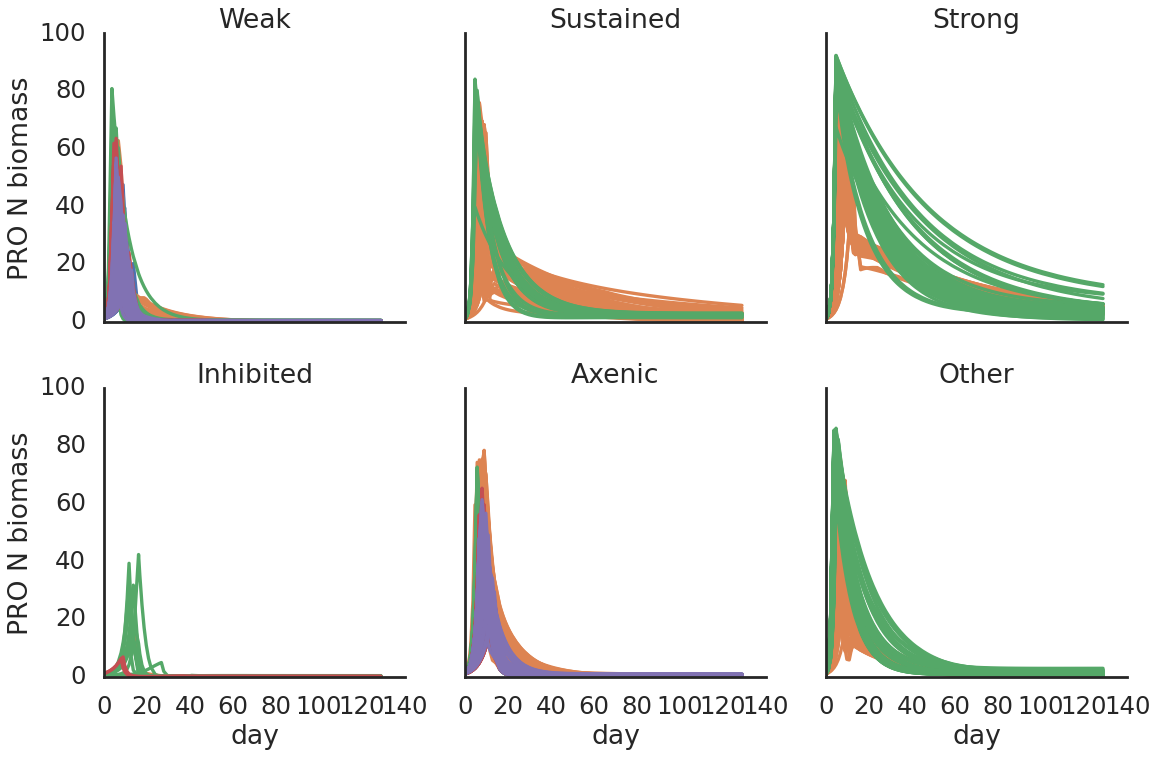

In [23]:
    g = sns.relplot(
        data=sample_df,
        kind='line', 
        estimator=None, units='run_id',
        hue='model',
        x='day', y=f'ref_Bp[N]', 
        col='y_pred', col_wrap=3,
        #facet_kws=dict( margin_titles=True),
        legend=False
    )
#    for (col_val), ax in g.axes_dict.items():
#         if col_val != 'Other':
#             sns.lineplot(
#                 data=refdf.loc[refdf['train_Group'].isin([col_val])],
#                 x='day', y='log_Nbiomass',
#             units='Sample', estimator=None, ax=ax, lw=0.5, color='red',
#                 zorder=-1,

#                          legend=False
#                         )
    g.set(ylabel='PRO N biomass')
    g.set_titles(col_template='{col_name}', row_template='{row_name}')

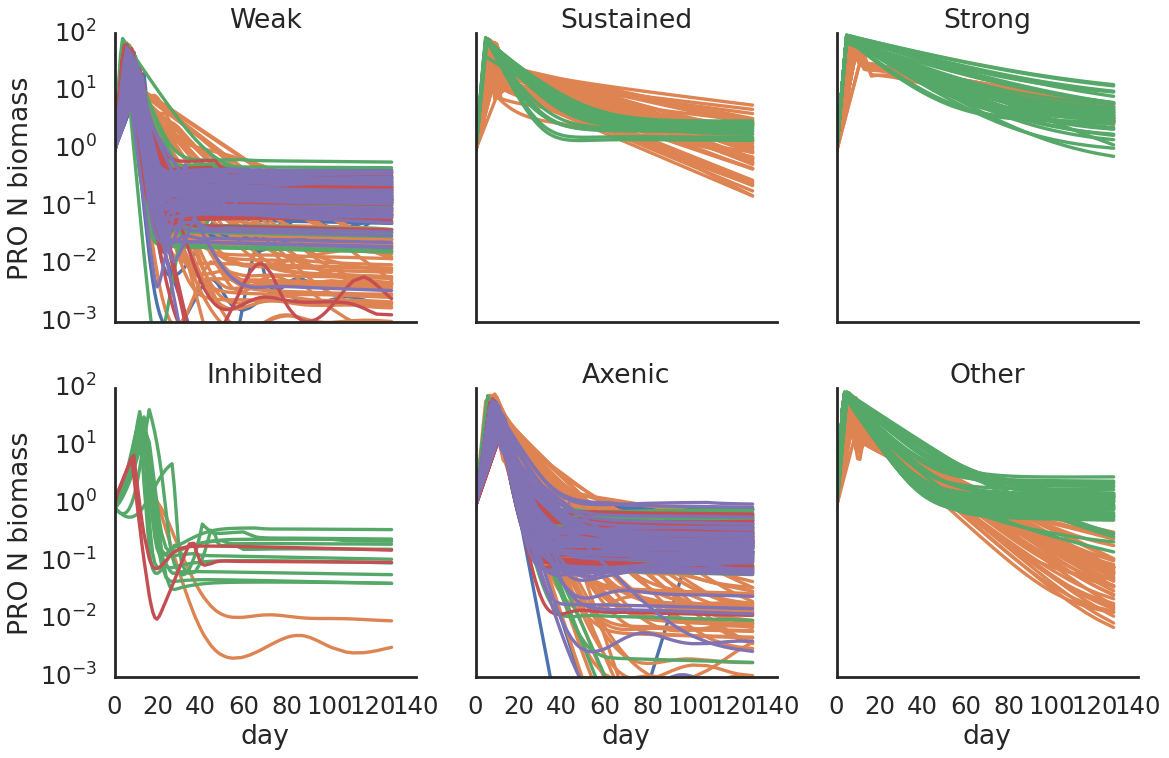

In [24]:
    g = sns.relplot(
        data=sample_df,
        kind='line', 
        estimator=None, units='run_id',
        hue='model',
        x='day', y=f'ref_Bp[N]', 
        col='y_pred', col_wrap=3,
        #facet_kws=dict( margin_titles=True),
        legend=False
    )
#    for (col_val), ax in g.axes_dict.items():
#         if col_val != 'Other':
#             sns.lineplot(
#                 data=refdf.loc[refdf['train_Group'].isin([col_val])],
#                 x='day', y='log_Nbiomass',
#             units='Sample', estimator=None, ax=ax, lw=0.5, color='red',
#                 zorder=-1,

#                          legend=False
#                         )
    g.set(ylabel='PRO N biomass', yscale='log')
    g.set_titles(col_template='{col_name}', row_template='{row_name}')

In [25]:
max_sim_prob.shape

(49349,)

In [26]:
df_predicted_classes.to_csv('monte_het_predicted_classes.csv.gz', index=False)

In [27]:
X_sim.shape, df_predicted_classes.shape

((49349, 138), (49349, 8))

In [28]:
df_predicted_classes.run_id.value_counts()

monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME_C1_29_lowN_all_EXOENZYME_h8519271514136708373    1
monte_OVERFLOW_40_monte_vpro_32_34_OVERFLOW_C4_37_lowN_all_OVERFLOW_h6878164821315599434        1
monte_OVERFLOW_3_monte_vpro_54_18_OVERFLOW_C1_46_lowN_all_OVERFLOW_h6878164821315599434         1
monte_OVERFLOW_3_monte_vpro_54_18_OVERFLOW_C1_9_lowN_all_OVERFLOW_h6878164821315599434          1
monte_OVERFLOW_3_monte_vpro_58_48_OVERFLOW_C2_22_lowN_all_OVERFLOW_h6878164821315599434         1
                                                                                               ..
monte_MIN_6_monte_vpro_90_35_MIN_C2_96_lowN_all_MIN_h-1541717058758371284                       1
monte_MIN_6_monte_vpro_90_91_MIN_C2_26_lowN_all_MIN_h-1541717058758371284                       1
monte_MIN_6_monte_vpro_90_91_MIN_C2_90_lowN_all_MIN_h-1541717058758371284                       1
monte_MIN_6_monte_vpro_92_40_MIN_C1_56_lowN_all_MIN_h-1541717058758371284                       1
monte_ROS_9_monte_vp

In [29]:
X_sim.index.value_counts()

monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME_C1_29_lowN_all_EXOENZYME_h8519271514136708373    1
monte_OVERFLOW_40_monte_vpro_32_34_OVERFLOW_C4_37_lowN_all_OVERFLOW_h6878164821315599434        1
monte_OVERFLOW_3_monte_vpro_54_18_OVERFLOW_C1_46_lowN_all_OVERFLOW_h6878164821315599434         1
monte_OVERFLOW_3_monte_vpro_54_18_OVERFLOW_C1_9_lowN_all_OVERFLOW_h6878164821315599434          1
monte_OVERFLOW_3_monte_vpro_58_48_OVERFLOW_C2_22_lowN_all_OVERFLOW_h6878164821315599434         1
                                                                                               ..
monte_MIN_6_monte_vpro_90_35_MIN_C2_96_lowN_all_MIN_h-1541717058758371284                       1
monte_MIN_6_monte_vpro_90_91_MIN_C2_26_lowN_all_MIN_h-1541717058758371284                       1
monte_MIN_6_monte_vpro_90_91_MIN_C2_90_lowN_all_MIN_h-1541717058758371284                       1
monte_MIN_6_monte_vpro_92_40_MIN_C1_56_lowN_all_MIN_h-1541717058758371284                       1
monte_ROS_9_monte_vp

In [30]:
df_sim_maxday  = X_sim[forest_features].reset_index()

In [31]:
df_sim_maxday = df_sim_maxday.melt(id_vars='run_id')
df_sim_maxday = pd.merge(df_sim_maxday, df_predicted_classes, on='run_id')
df_sim_maxday

,run_id,variable,value,y_pred,max_prob,idx,media,which,model,hash
0,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,max_Nday,5.720139,Sustained,0.982946,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,lowN,all,EXOENZYME,h8519271514136708373
1,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,max_Nbiomass,48.478110,Sustained,0.982946,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,lowN,all,EXOENZYME,h8519271514136708373
2,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,max_Cday,5.720139,Sustained,0.982946,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,lowN,all,EXOENZYME,h8519271514136708373
3,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,max_Cbiomass,399.217701,Sustained,0.982946,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,lowN,all,EXOENZYME,h8519271514136708373
4,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,mean_Nbiomass,4.303229,Sustained,0.982946,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,lowN,all,EXOENZYME,h8519271514136708373
...,...,...,...,...,...,...,...,...,...,...
592183,monte_ROS_9_monte_vpro_97_23_ROS_C1_5_lowN_all...,mean_Cbiomass,1.000000,Weak,0.990698,monte_ROS_9_monte_vpro_97_23_ROS_C1_5,lowN,all,ROS,h-8660846992299669535
592184,monte_ROS_9_monte_vpro_97_23_ROS_C1_5_lowN_all...,std_Cbiomass,0.000000,Weak,0.990698,monte_ROS_9_monte_vpro_97_23_ROS_C1_5,lowN,all,ROS,h-8660846992299669535
592185,monte_ROS_9_monte_vpro_97_23_ROS_C1_5_lowN_all...,median_Cbiomass,1.000000,Weak,0.990698,monte_ROS_9_monte_vpro_97_23_ROS_C1_5,lowN,all,ROS,h-8660846992299669535
592186,monte_ROS_9_monte_vpro_97_23_ROS_C1_5_lowN_all...,last_dayN,7.984028,Weak,0.990698,monte_ROS_9_monte_vpro_97_23_ROS_C1_5,lowN,all,ROS,h-8660846992299669535


In [32]:
df_sim_maxday.columns

Index(['run_id', 'variable', 'value', 'y_pred', 'max_prob', 'idx', 'media',
       'which', 'model', 'hash'],
      dtype='object')

In [33]:
gorder = [ 'Strong', 'Sustained', 'Weak', 'Inhibited','Axenic', 'Other']
gpalette = sns.color_palette('Set2', n_colors=4).as_hex() + ['black', 'lightgrey']
sns.color_palette(gpalette)

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.0, 0.0, 0.0),
 (0.8274509803921568, 0.8274509803921568, 0.8274509803921568)]

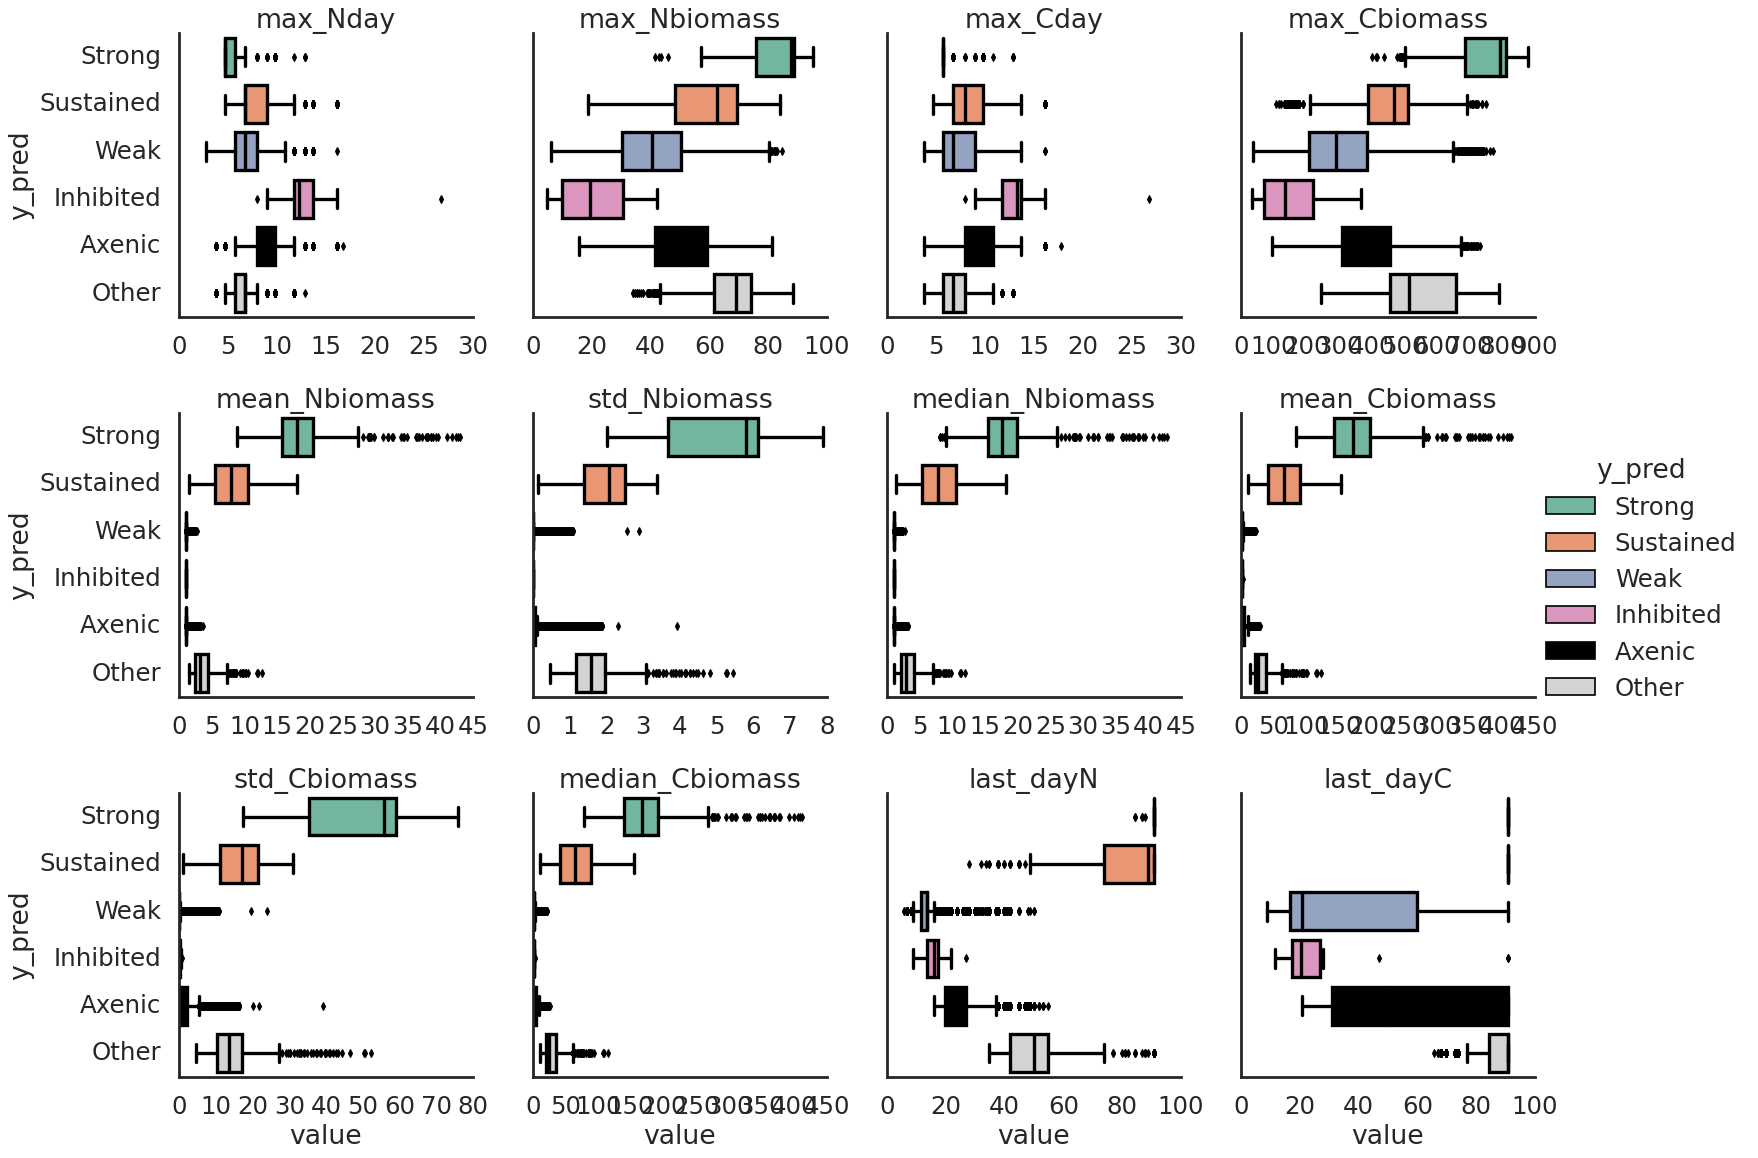

In [34]:
sns.set_context('poster')
sns.catplot(
    data=df_sim_maxday,
    y='y_pred', x='value', order=gorder,
    col='variable', col_wrap=4,
    kind='box',
    hue='y_pred', hue_order=gorder, palette=gpalette,
    sharex=False, dodge=False,
).set_titles(col_template='{col_name}')


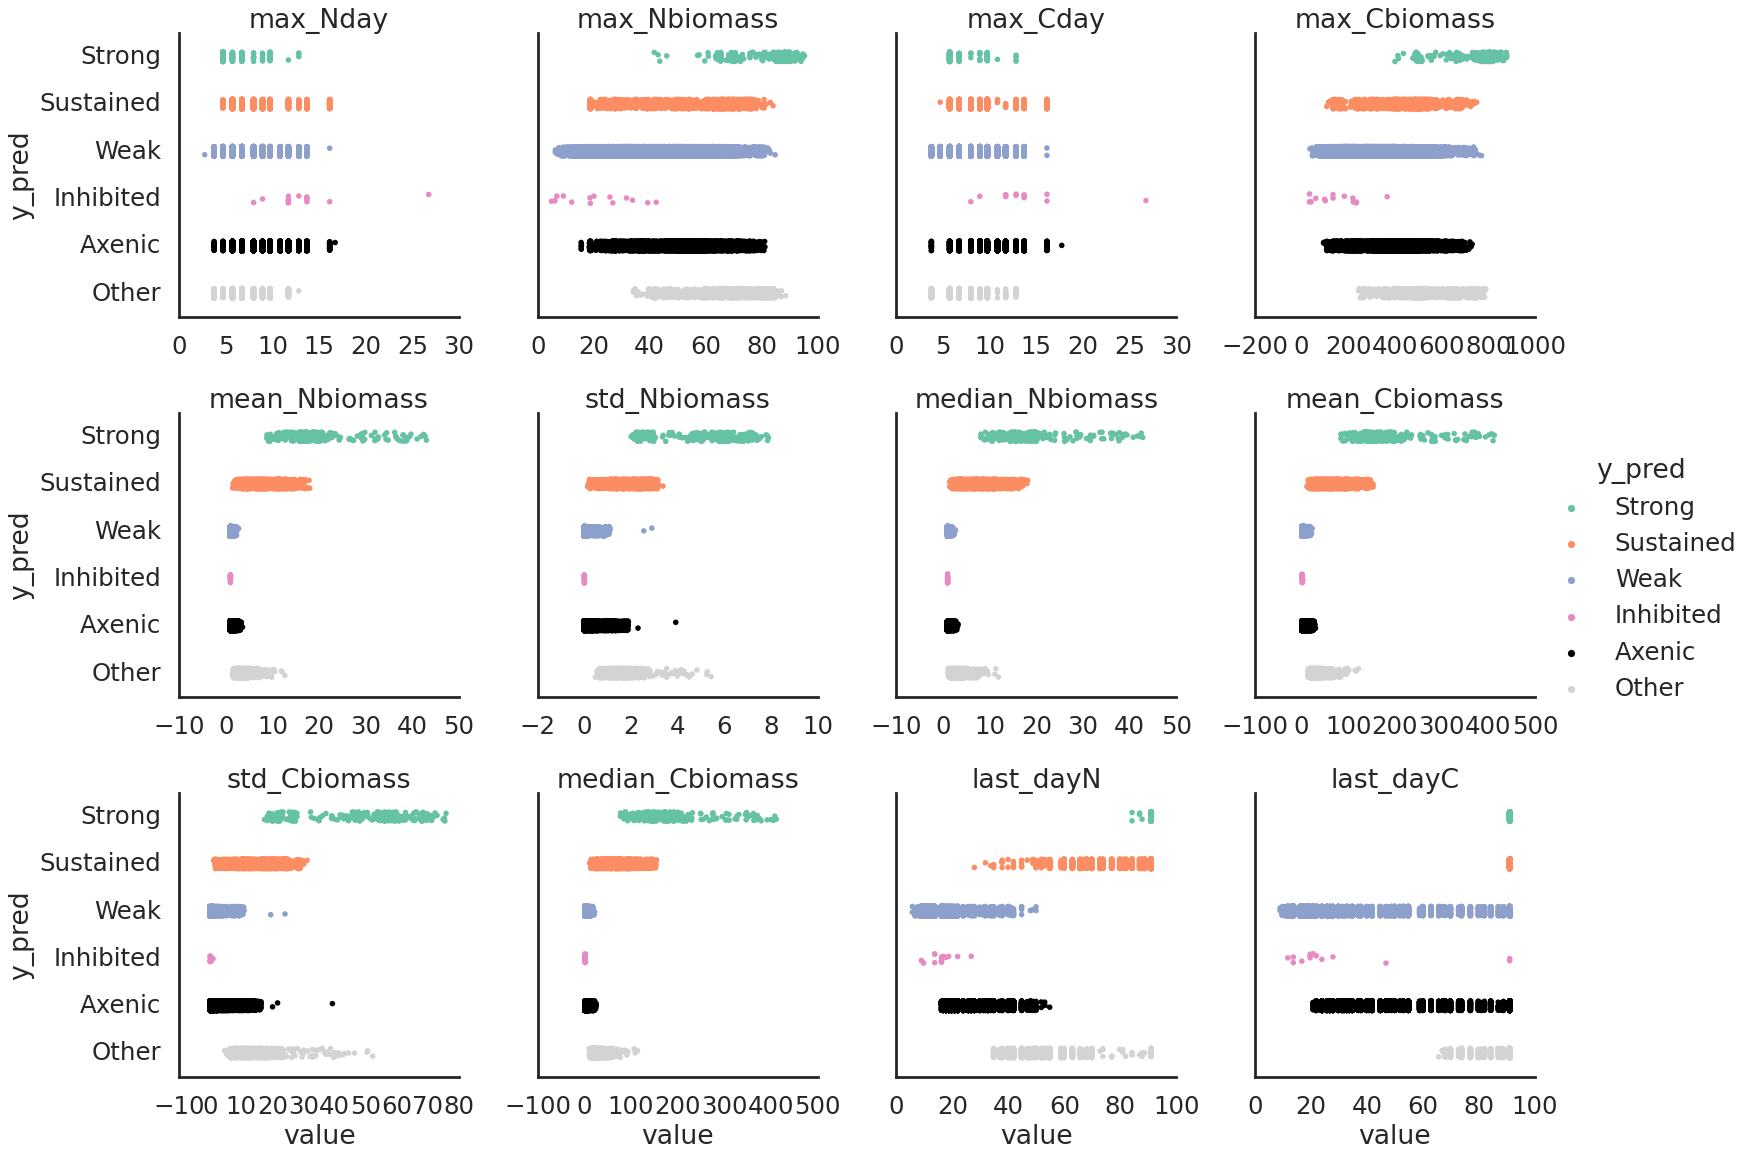

In [35]:
sns.set_context('poster')
sns.catplot(
    data=df_sim_maxday,
    y='y_pred', x='value', order=gorder,
    col='variable', col_wrap=4,
    #kind='box',
    hue='y_pred', hue_order=gorder, palette=gpalette,
    sharex=False, #dodge=False,
).set_titles(col_template='{col_name}')
